In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('walkrun_clean.csv',index_col=0)
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,date_time
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,2017-06-30 13:51:16.646117985
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,2017-06-30 13:51:16.846738994


In [3]:
df.tail()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,date_time
88583,1,-0.3145,-0.5619,0.2554,-1.4393,0.1370,-1.5961,2017-07-17 20:16:02.884990990
88584,1,0.2041,0.4117,-0.1134,0.8280,0.8089,1.9331,2017-07-17 20:16:03.285188019
88585,1,-2.9406,0.4090,0.0523,2.2648,0.2342,3.7748,2017-07-17 20:16:03.485148012
88586,1,-0.0219,-0.5711,0.1658,0.2210,-1.5538,0.6392,2017-07-17 20:16:03.684989988
88587,1,-2.1825,0.1876,0.0430,-2.2937,-0.6059,-0.6293,2017-07-17 20:16:03.851119750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88588 entries, 0 to 88587
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   activity        88588 non-null  int64  
 1   acceleration_x  88588 non-null  float64
 2   acceleration_y  88588 non-null  float64
 3   acceleration_z  88588 non-null  float64
 4   gyro_x          88588 non-null  float64
 5   gyro_y          88588 non-null  float64
 6   gyro_z          88588 non-null  float64
 7   date_time       88588 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 6.1+ MB


In [5]:
df = df.drop(["date_time"],axis=1)

In [6]:
df.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88588 entries, 0 to 88587
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   activity        88588 non-null  int64  
 1   acceleration_x  88588 non-null  float64
 2   acceleration_y  88588 non-null  float64
 3   acceleration_z  88588 non-null  float64
 4   gyro_x          88588 non-null  float64
 5   gyro_y          88588 non-null  float64
 6   gyro_z          88588 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.4 MB


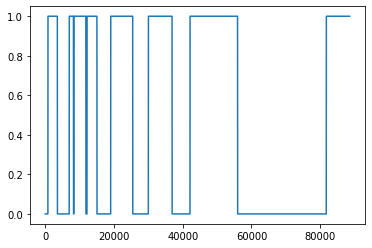

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.activity)

In [9]:
df.shape

(88588, 7)

In [10]:
88588*0.9

79729.2

# since we are dealing with sequential models, random splitting doesnt work

# so we need to time based splitting for train and test

In [11]:
train_data = df[:79720]
test_data = df[79720:]

In [12]:
train_data.head()

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [13]:
train_data.shape

(79720, 7)

In [14]:
test_data.shape

(8868, 7)

### Here we are trying to use past 50 data to predict the new data i.e look back value of 50.
SO, THE MODEL NEEDS PAST 50 DATA TO PREDICT THE PRESENT OR FUTURE ACTIVITY.

# SO WE NEED TO RESHAPE THE DATA ACCORDING (50,6)

In [15]:
#CREATING sequencial data for lstms

X_train = []
y_train = []

for i in range(50, 79720):
    X_train.append(train_data.iloc[i-50:i,1:])
    y_train.append(train_data.activity[i])

In [16]:
import numpy as np
X_train = np.array(X_train)

In [17]:
X_train.shape

(79670, 50, 6)

In [18]:
X_train = X_train.reshape(X_train.shape[0], 50, 6)

In [19]:
X_train.shape

(79670, 50, 6)

In [20]:
y_train = np.array(y_train)

In [21]:
y_train.shape

(79670,)

# Plotting test and train data classes to avoid overfitting towards one class

In [32]:
import matplotlib.pyplot as plt

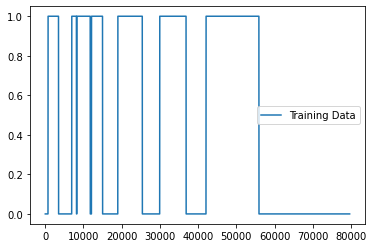

In [34]:
plt.plot(y_train)
plt.legend(["Training Data"])

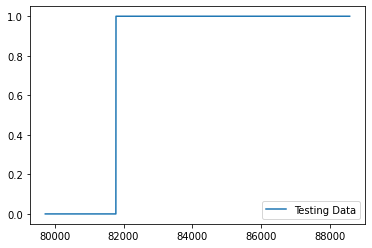

In [38]:
plt.plot(test_data.activity)
plt.legend(["Testing Data"])

In [40]:
temp = pd.DataFrame(y_train)

In [42]:
temp.value_counts()

0    42116
1    37554
dtype: int64

In training data Walk Class and Run Class are not heavily imbalanced so, we can use this train data for model

### now the X_data is in shape of (79670,50,6)

* so there are total of 79670 datapoints with shape (50,6)

            * where 6 is the number of features used

            * where 50 is the number of past data needed

### Similarly for Y_data

* FOR EVERY 50 PAST VALUES OF X THERE SHOULD BE A Y VALUE

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [23]:
model = Sequential()
# Initializing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(32, input_shape=(50, 6)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4992      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4992      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Training the model
model.fit(X_train,
          y_train,
          batch_size=32,
          epochs=30)

Epoch 1/30
2490/2490 [==============================] - 24s 10ms/step - loss: 0.0056
Epoch 2/30
2490/2490 [==============================] - 29s 12ms/step - loss: 0.0012 0s - loss: 0
Epoch 3/30
2490/2490 [==============================] - 28s 11ms/step - loss: 9.8943e-04
Epoch 4/30
2490/2490 [==============================] - 25s 10ms/step - loss: 8.1759e-04
Epoch 5/30
2490/2490 [==============================] - 26s 10ms/step - loss: 7.7695e-04
Epoch 6/30
2490/2490 [==============================] - 26s 11ms/step - loss: 7.2278e-04
Epoch 7/30
2490/2490 [==============================] - 27s 11ms/step - loss: 6.5558e-04
Epoch 8/30
2490/2490 [==============================] - 27s 11ms/step - loss: 5.8734e-04
Epoch 9/30
2490/2490 [==============================] - 30s 12ms/step - loss: 5.4942e-04
Epoch 10/30
2490/2490 [==============================] - 29s 12ms/step - loss: 5.5690e-04
Epoch 11/30
2490/2490 [==============================] - 26s 10ms/step - loss: 4.8960e-04
Epoch 12/30
24

In [29]:
model.history.history["loss"]

[0.005603845696896315,
 0.0012443173909559846,
 0.0009894291870296001,
 0.0008175931870937347,
 0.0007769515505060554,
 0.0007227808237075806,
 0.0006555797881446779,
 0.0005873435875400901,
 0.0005494169308803976,
 0.0005568968481384218,
 0.000489598314743489,
 0.0005115288076922297,
 0.0004965263651683927,
 0.00045341599616222084,
 0.0004533165483735502,
 0.0004342676838859916,
 0.0004321956366766244,
 0.00040371212526224554,
 0.00038953102193772793,
 0.0004257773980498314,
 0.00038424579543061554,
 0.00038181678974069655,
 0.00036544163594953716,
 0.0003608896804507822,
 0.00037877517752349377,
 0.0003746332076843828,
 0.0003585073573049158,
 0.00038425883394666016,
 0.0003701870155055076,
 0.0003794220101553947]

# Plotting the accuracy

Text(0.5, 1.0, 'LOSS PLOT')

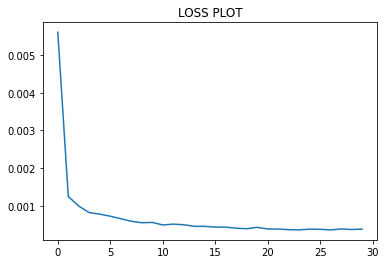

In [43]:
plt.plot(model.history.history["loss"])
plt.title("LOSS PLOT")

# Testing the model for predictions

###  since the Testing data should be same as the shape of training data

we need to reshape the data similarly

In [44]:
test_data.shape

(8868, 7)

In [45]:
train_data[-50:]

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
79670,0,0.3605,-1.3903,-0.0751,-1.2553,-1.1000,-1.4261
79671,0,0.4173,-1.0257,-0.0496,0.2283,0.8497,1.7944
79672,0,0.1392,-0.7511,-0.0582,1.1432,-0.2227,1.8020
79673,0,0.4475,-1.0380,-0.2802,0.4798,0.6652,1.3596
79674,0,0.5020,-1.0712,-0.2774,-0.4661,-1.1742,-1.6174
79675,0,0.3608,-0.8310,-0.0593,-0.4919,-0.7525,-2.9269
79676,0,0.3005,-1.0578,0.0464,-0.4411,0.8135,0.0454
79677,0,0.4035,-1.0898,-0.1158,0.8011,-1.0263,2.9432
79678,0,0.3770,-0.8138,-0.1346,0.5468,0.4809,1.0880
79679,0,0.6059,-1.3421,-0.3215,0.2492,-0.9078,0.3992


In [46]:
last_50_train  = train_data[-50:]

In [47]:
new_test = np.concatenate((last_50_train, test_data), axis=0)

In [48]:
new_test.shape

(8918, 7)

In [49]:
new_test = pd.DataFrame(new_test)

In [50]:
new_test.head()

,0,1,2,3,4,5,6
0,0.0,0.3605,-1.3903,-0.0751,-1.2553,-1.1000,-1.4261
1,0.0,0.4173,-1.0257,-0.0496,0.2283,0.8497,1.7944
2,0.0,0.1392,-0.7511,-0.0582,1.1432,-0.2227,1.8020
3,0.0,0.4475,-1.0380,-0.2802,0.4798,0.6652,1.3596
4,0.0,0.5020,-1.0712,-0.2774,-0.4661,-1.1742,-1.6174


In [54]:
#CREATING sequencial data for lstms

X_test = []
y_test = []

for i in range(50, 8918):
    X_test.append(new_test.iloc[i-50:i,1:])
    y_test.append(new_test[0].iloc[i])

In [55]:
X_test = np.array(X_test)

In [56]:
X_test.shape

(8868, 50, 6)

In [57]:
y_test = np.array(y_test)

In [58]:
y_test.shape

(8868,)

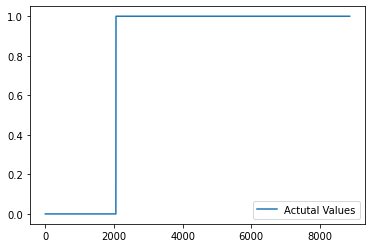

In [87]:
plt.plot(y_test)
plt.legend(["Actutal Values"])

In [60]:
y_predict = model.predict(X_test)

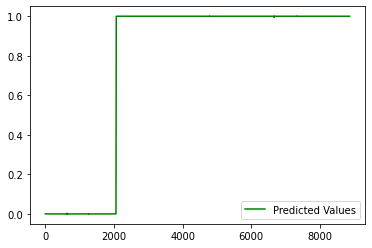

In [86]:
plt.plot(y_predict,"g")
plt.legend(["Predicted Values"])

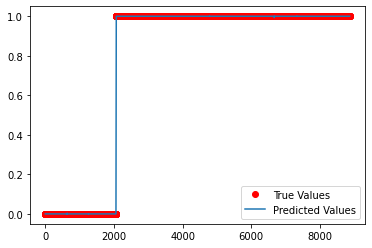

In [88]:
plt.plot(y_test,"ro")
plt.plot(y_predict)
plt.legend(['True Values', 'Predicted Values'])

In [72]:
y_predict

array([[7.4691309e-07],
       [3.2952758e-07],
       [8.4098718e-07],
       ...,
       [9.9999940e-01],
       [1.0000000e+00],
       [9.9999976e-01]], dtype=float32)

### y_predict values are not in the form of 0 or 1 classes.
We cant evaluate our model using this non binary values. So, we will convert them by settting a threshold of 0.5.

In [76]:
y_pred_binary=[]
for x in y_predict:
    if x<=0.5:
        y_pred_binary.append(0)
    else:
        y_pred_binary.append(1)

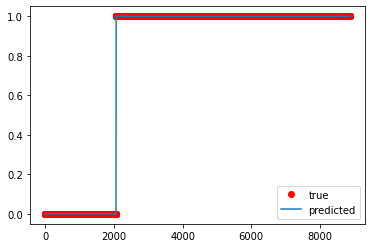

In [77]:
plt.plot(y_test,"ro")
plt.plot(y_pred_binary)
plt.legend(['true', 'predicted'])

# Metrics Evaluation

In [78]:
from sklearn.metrics import accuracy_score, classification_report

In [80]:
accuracy_score(y_test,y_pred_binary)

0.9995489400090212

In [82]:
print(classification_report(y_test,y_pred_binary))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2057
         1.0       1.00      1.00      1.00      6811

    accuracy                           1.00      8868
   macro avg       1.00      1.00      1.00      8868
weighted avg       1.00      1.00      1.00      8868



# Conclusions


We have got 100% accuracy with Lstms. Since Lstms work very well with sequential data, the results are more accurate with LSTMs than normal models.